In [1]:
# importando as bibliotecas
import pandas as pd
import plotly.express as px

In [3]:
excel_file = pd.ExcelFile("C:/Users/odair.colares/Documents/1_AnalistaDeDados/mes_.xlsx")
df = pd.read_excel(excel_file, sheet_name='mes')
# Renomeando Linhas
df['Turno'] = df['Turno'].str.replace('1Âº Turno', '1º_Turno')
df['Turno'] = df['Turno'].str.replace('Fora de', 'Fora de turno')
df['Turno'] = df['Turno'].str.replace('2Âº Turno', '2º Turno')
df['Lider'] = df['Lider'].str.replace('filipe carvalho fonseca', 'Filipe Fonseca')
df['Lider'] = df['Lider'].str.replace('elaine mendes', 'Elaine Mendes')
df['Lider'] = df['Lider'].str.replace('kaisa carvalho lima', 'Kaisa Lima')
df['Justificativa'] = df['Justificativa'].str.replace('Em anÃ¡lise', 'Em_análise')
df['Justificativa'] = df['Justificativa'].str.replace('em anÃ¡lise', 'Em_análise')

In [4]:
df.Semana.describe()

count    81.000000
mean     32.395062
std       0.605785
min      32.000000
25%      32.000000
50%      32.000000
75%      33.000000
max      34.000000
Name: Semana, dtype: float64

In [5]:
#df.loc[:,['Data', 'Modelo']]
#df.loc[:, 'Lider':'Modelo']
#df.loc[:, ['temperatura', 'classification']]
df[(df.Lider == 'Haniel Nascimento Moura') | (df.Lider == 'Filipe Fonseca')].loc[:, 'Data':'Hota Inicio'].head()

,Data,Semana,Mes,Modelo,Horas Disponiveis,Minutos Disponiveis,Hota Inicio
0,2021-08-02 07:21:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00
1,2021-08-02 07:22:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 09:00:00
2,2021-08-02 07:23:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00
3,2021-08-02 07:24:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 13:00:00
4,2021-08-02 07:25:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00


In [6]:
df.groupby('Lider' ,sort=False).agg({'Status': df.value_counts}).reset_index()

,Lider,Status
0,Haniel Nascimento Moura,"[28, 16, 2]"
1,Filipe Fonseca,"[5, 1]"
2,Elaine Mendes,2
3,Eduardo de Castro Marinho,3
4,Jomara Almeida dos Santos,"[15, 1]"
5,Ery Rool Tourinho,5
6,Kaisa Lima,"[1, 1]"
7,Maria Socorro Ribeiro Rodrigues,1


In [7]:
# Maior numero de chamado finalizados
df[df.Status == 'Aguardando'].groupby(['Lider']).count().sort_values(['Status'], ascending=False).loc[:, 'Status'].reset_index()
#px.bar(df2, x='Lider', y='Status')

,Lider,Status
0,Haniel Nascimento Moura,16
1,Filipe Fonseca,5
2,Eduardo de Castro Marinho,3
3,Elaine Mendes,2
4,Jomara Almeida dos Santos,1
5,Kaisa Lima,1


In [8]:
# Maiores tempos com linha paradas
df2 = df.groupby('Lider', sort= False).mean().reset_index()
px.bar(df2, x='Lider', y='Tempo Parado %', title= 'Maiores tempos com linha paradas')

In [9]:
df2 = df.groupby('Lider', sort= False).mean().reset_index()
df2.head(7)

,Lider,Semana,Mes,Horas Disponiveis,Minutos Disponiveis,Minutos Parados,Tempo Parado %
0,Haniel Nascimento Moura,32.065217,8.0,8.48,508.8,11831.630435,0.232535
1,Filipe Fonseca,33.000000,8.0,8.48,508.8,6897.333333,0.135550
2,Elaine Mendes,32.500000,8.0,8.48,508.8,13184.000000,0.259100
3,Eduardo de Castro Marinho,32.000000,8.0,8.48,508.8,18775.666667,0.369000
4,Jomara Almeida dos Santos,32.875000,8.0,8.48,508.8,2270.125000,0.044625
5,Ery Rool Tourinho,32.800000,8.0,8.48,508.8,116.000000,0.002280
6,Kaisa Lima,33.000000,8.0,8.48,508.8,4203.500000,0.082600


<AxesSubplot:xlabel='Lider'>

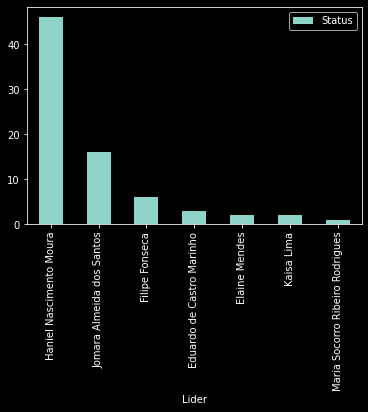

In [10]:
# Maior turno com abertura de chamados
df[df.Turno == '1º_Turno'].groupby(['Lider']).count().loc[:, ['Status']].sort_values('Status', ascending=False).plot.bar()